In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from keras.layers import Conv1D, MaxPool1D, Flatten
from keras.layers import Dropout, Dense, TimeDistributed,LeakyReLU,LSTM,TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import backend as K
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import svm
import matplotlib.pyplot as plt
from keras.constraints import maxnorm

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data_Oct_w2.csv')
df = df.replace('-',np.nan)
df = df.fillna(0)
X = df.drop(['REGISTRATION_DATE','RETAILER_NUMBER','MSISDN','FAKE'],axis=1)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
X = X.values
Y = df['FAKE']
Y = Y.values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,stratify=Y)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [3]:
input_shape = (X.shape[1],1)
X = X.reshape(X.shape[0],X.shape[1],1)

In [5]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(32, activation='relu')))
model.add(TimeDistributed(Dense(16, activation='relu')))
model.add(TimeDistributed(Dense(8, activation='relu')))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.load_weights('Trail_weights.h5')
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train, epochs=10, shuffle=True,validation_data=(X_test,y_test))
model.save('Lstm_model_2.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 64)            8256      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 50, 32)            2080      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 50, 16)            528       
_______________________________________

In [16]:
model = Sequential()
model.add(Conv1D(128, 3, padding='same', input_shape=input_shape))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv1D(64, 3, activation='relu',padding='same'))
model.add(Conv1D(32, 3, activation='relu',padding='same'))
model.add(Conv1D(16, 3, activation='relu',padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['acc'])
history = model.fit(X_train,y_train, epochs=12, shuffle=True,validation_data=(X_test,y_test))
model.save('model.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 50, 128)           512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 50, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 50, 64)            24640     
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 50, 32)            6176      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 50, 16)            1552      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 25, 16)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 16)           

In [4]:
model = load_model('updated_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [6]:
print(history.history.keys())

NameError: name 'history' is not defined

In [15]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)

y_pred_bool = []
for i in range(len(y_pred)):
    if y_pred[i] > 0.50:
        y_pred_bool.append(1)
    else:
        y_pred_bool.append(0) 


report = classification_report(y_test, y_pred_bool,output_dict=True)
df1 = pd.DataFrame(report).transpose()

209715/209715 [==============================] - 98s 467us/step


In [16]:
df1

,precision,recall,f1-score,support
0,0.661662,0.725886,0.692288,104599.000000
1,0.698072,0.630646,0.662648,105116.000000
accuracy,0.678149,0.678149,0.678149,0.678149
macro avg,0.679867,0.678266,0.677468,209715.000000
weighted avg,0.679912,0.678149,0.677431,209715.000000


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Train on 838860 samples, validate on 209715 samples
Epoch 1/40
838860/838860 [==============================] - 87s 104us/step - loss: 0.5964 - accuracy: 0.6657 - val_loss: 0.5831 - val_accuracy: 0.6740
Epoch 2/40
838860/838860 [==============================] - 94s 112us/step - loss: 0.5915 - accuracy: 0.6710 - val_loss: 0.5809 - val_accuracy: 0.6746
Epoch 3/40
838860/838860 [==============================] - 97s 115us/step - loss: 0.5904 - accuracy: 0.6721 - val_loss: 0.5809 - val_accuracy: 0.6761
Epoch 4/40
838860/838860 [==============================] - 99s 118us/step - loss: 0.5905 - accuracy: 0.6727 - val_loss: 0.5819 - val_accuracy: 0.6760
Epoch 5/40
838860/838860 [==============================] - 96s 114us/step - loss: 0.5903 - accuracy: 0.6725 - val_loss: 0.5802 - val_accuracy: 0.6768
Epoch 6/40
838860/838860 [==============================] - 95s 113us/step - loss: 0.5902 - accuracy: 0.6731 - val_loss: 0.5806 - val_accuracy: 0.6762
Epoch 7/40
838860/838860 [================

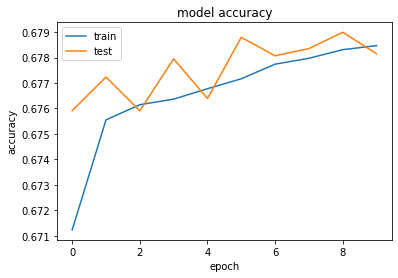

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# X = X.reshape(X.shape[0],X.shape[1],1)
y_pred = model.predict(X, batch_size=64, verbose=1)

251187/251187 [==============================] - 162s 645us/step


In [6]:
df['pred'] = y_pred

In [7]:
df_sort = df.sort_values(by=['pred'])

df_sort['ind'] = [x for x in range(df_sort.shape[0])]


df_sort['bucket_no'] = round(   ((df_sort['ind']+1)/df_sort.shape[0]) * 10 )

In [8]:
print(df_sort.groupby(['bucket_no']).min()['pred'], df_sort.groupby(['bucket_no']).max()['pred'], df_sort.groupby(['bucket_no']).count()['RETAILER_NUMBER'], df_sort[df_sort['FAKE'] == 1].groupby(['bucket_no']).count()['RETAILER_NUMBER'], df_sort[df_sort['FAKE'] == 1].groupby(['bucket_no']).count()['RETAILER_NUMBER']/df_sort.groupby(['bucket_no']).count()['RETAILER_NUMBER'])

bucket_no
0.0     0.000486
1.0     0.067426
2.0     0.102549
3.0     0.135341
4.0     0.171577
5.0     0.211526
6.0     0.254185
7.0     0.307529
8.0     0.380508
9.0     0.474685
10.0    0.600819
Name: pred, dtype: float32 bucket_no
0.0     0.067426
1.0     0.102547
2.0     0.135340
3.0     0.171576
4.0     0.211524
5.0     0.254184
6.0     0.307527
7.0     0.380506
8.0     0.474683
9.0     0.600806
10.0    0.972367
Name: pred, dtype: float32 bucket_no
0.0     12559
1.0     25119
2.0     25118
3.0     25119
4.0     25119
5.0     25118
6.0     25119
7.0     25119
8.0     25118
9.0     25119
10.0    12560
Name: RETAILER_NUMBER, dtype: int64 bucket_no
0.0       417
1.0      1535
2.0      2301
3.0      3197
4.0      4204
5.0      5427
6.0      6670
7.0      8451
8.0     10502
9.0     13455
10.0     9206
Name: RETAILER_NUMBER, dtype: int64 bucket_no
0.0     0.033203
1.0     0.061109
2.0     0.091608
3.0     0.127274
4.0     0.167363
5.0     0.216060
6.0     0.265536
7.0     0.336439
8.0   

In [9]:
df1 = df_sort.groupby(['bucket_no']).min()['pred']

In [10]:
df1 = pd.Series(df1,name='min')

In [11]:
df2 = df_sort.groupby(['bucket_no']).max()['pred']
df2 = pd.Series(df2,name='max')

In [12]:
df3 = df_sort.groupby(['bucket_no']).count()['RETAILER_NUMBER']
df3 = pd.Series(df3,name='Total')
df4 = df_sort[df_sort['FAKE'] == 1].groupby(['bucket_no']).count()['RETAILER_NUMBER']
df4 = pd.Series(df4,name = 'Fakes')
df5 = df_sort[df_sort['FAKE'] == 1].groupby(['bucket_no']).count()['RETAILER_NUMBER']/df_sort.groupby(['bucket_no']).count()['RETAILER_NUMBER']
df5 = pd.Series(df5,name='Pred')

In [13]:
df_final = pd.concat([df1,df2,df3,df4,df5],axis=1)

In [14]:
df_final

,min,max,Total,Fakes,Pred
bucket_no,,,,,
0.0,0.000486,0.067426,12559,417,0.033203
1.0,0.067426,0.102547,25119,1535,0.061109
2.0,0.102549,0.135340,25118,2301,0.091608
3.0,0.135341,0.171576,25119,3197,0.127274
4.0,0.171577,0.211524,25119,4204,0.167363
5.0,0.211526,0.254184,25118,5427,0.216060
6.0,0.254185,0.307527,25119,6670,0.265536
7.0,0.307529,0.380506,25119,8451,0.336439
8.0,0.380508,0.474683,25118,10502,0.418107


In [15]:
a  = df_final['Fakes'].values

In [16]:
a = [ele for ele in reversed(a)]

In [17]:
a

[9206, 13455, 10502, 8451, 6670, 5427, 4204, 3197, 2301, 1535, 417]

In [18]:
for i in range(len(a)):
    if i !=0:
        a[i] = a[i]+ a[i-1]

In [19]:
a 

[9206, 22661, 33163, 41614, 48284, 53711, 57915, 61112, 63413, 64948, 65365]

In [20]:
a = [ele for ele in reversed(a)]

In [21]:
a

[65365, 64948, 63413, 61112, 57915, 53711, 48284, 41614, 33163, 22661, 9206]

In [22]:
df6 = pd.Series(a,name='fake_count')

In [23]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

In [24]:
df_final

,min,max,Total,Fakes,Pred,fake_count
0.0,0.000486,0.067426,12559,417,0.033203,65365
1.0,0.067426,0.102547,25119,1535,0.061109,64948
2.0,0.102549,0.135340,25118,2301,0.091608,63413
3.0,0.135341,0.171576,25119,3197,0.127274,61112
4.0,0.171577,0.211524,25119,4204,0.167363,57915
5.0,0.211526,0.254184,25118,5427,0.216060,53711
6.0,0.254185,0.307527,25119,6670,0.265536,48284
7.0,0.307529,0.380506,25119,8451,0.336439,41614
8.0,0.380508,0.474683,25118,10502,0.418107,33163
9.0,0.474685,0.600806,25119,13455,0.535650,22661


In [25]:
df_final['recall'] = df_final['fake_count']/df_final['Fakes'].sum()

In [26]:
df_final

,min,max,Total,Fakes,Pred,fake_count,recall
0.0,0.000486,0.067426,12559,417,0.033203,65365,1.000000
1.0,0.067426,0.102547,25119,1535,0.061109,64948,0.993620
2.0,0.102549,0.135340,25118,2301,0.091608,63413,0.970137
3.0,0.135341,0.171576,25119,3197,0.127274,61112,0.934935
4.0,0.171577,0.211524,25119,4204,0.167363,57915,0.886025
5.0,0.211526,0.254184,25118,5427,0.216060,53711,0.821709
6.0,0.254185,0.307527,25119,6670,0.265536,48284,0.738683
7.0,0.307529,0.380506,25119,8451,0.336439,41614,0.636640
8.0,0.380508,0.474683,25118,10502,0.418107,33163,0.507351
9.0,0.474685,0.600806,25119,13455,0.535650,22661,0.346684


In [5]:
import eli5

e:\miniconda\envs\vir_env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
e:\miniconda\envs\vir_env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 53 columns):
RETAILER_EL_NUMBER                1048575 non-null object
REG_Q                             1048575 non-null int64
MSISDN                            1048575 non-null int64
TOT_MOB_REV_WK1                   1048575 non-null float64
TOT_VC_REV_WK1                    1048575 non-null float64
TOT_VC_OG_REV_WK1                 1048575 non-null float64
TOT_VC_OG_MOU_WK1                 1048575 non-null float64
TOT_VC_OG_COUNT_WK1               1048575 non-null float64
TOT_VC_IC_MOU_WK1                 1048575 non-null float64
TOT_VC_IC_COUNT_WK1               1048575 non-null float64
TOT_VC_LCL_OG_REV_WK1             1048575 non-null float64
TOT_VC_LCL_OG_MOU_WK1             1048575 non-null float64
TOT_VC_LCL_OG_COUNT_WK1           1048575 non-null float64
TOT_VC_LCL_ONNET_OG_REV_WK1       1048575 non-null float64
TOT_VC_LCL_ONNET_OG_MOU_WK1       1048575 non-null float64
TOT_VC_

In [8]:
from lime.lime_tabular import LimeTabularExplainer

In [11]:
cat_features = []
for values in df.columns:
    cat_features.append(values)

In [21]:
categorical_names = {}
for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col.split("__")[1] 
                                                       for new_col in new_ohe_features 
                                                       if new_col.split("__")[0] == col]

NameError: name 'new_ohe_features' is not defined

In [22]:
ohe_categories = model.named_transformers_["categorical"].categories_

AttributeError: 'Sequential' object has no attribute 'named_transformers_'

In [19]:
cat_features

['REG_Q',
 'TOT_MOB_REV_WK1',
 'TOT_VC_REV_WK1',
 'TOT_VC_OG_REV_WK1',
 'TOT_VC_OG_MOU_WK1',
 'TOT_VC_OG_COUNT_WK1',
 'TOT_VC_IC_MOU_WK1',
 'TOT_VC_IC_COUNT_WK1',
 'TOT_VC_LCL_OG_REV_WK1',
 'TOT_VC_LCL_OG_MOU_WK1',
 'TOT_VC_LCL_OG_COUNT_WK1',
 'TOT_VC_LCL_ONNET_OG_REV_WK1',
 'TOT_VC_LCL_ONNET_OG_MOU_WK1',
 'TOT_VC_LCL_ONNET_OG_COUNT_WK1',
 'TOT_VC_LCL_OFFNET_OG_REV_WK1',
 'TOT_VC_LCL_OFFNET_OG_MOU_WK1',
 'TOT_VC_LCL_OFFNET_OG_COUNT_WK1',
 'TOT_VC_CHARGEABLE_MOU_WK1',
 'TOT_VC_CHARGEABLE_COUNT_WK1',
 'TOT_VC_BONUS_MOU_WK1',
 'TOT_VC_BONUS_COUNT_WK1',
 'TOT_VC_BUNDLE_REV_WK1',
 'TOT_VC_RC_REV_WK1',
 'TOT_VC_RC_MOU_WK1',
 'TOT_VC_RC_COUNT_WK1',
 'TOT_VC_ONNET_INC_COUNT_WK1',
 'TOT_VC_OFFNET_INC_MOU_WK1',
 'TOT_VC_OFFNET_INC_COUNT_WK1',
 'TOT_DATA_VOL_WK1',
 'TOT_DATA_PPU_VOL_WK1',
 'TOT_DATA_BUNDLE_VOL_WK1',
 'TOT_DATA_BONUS_VOL_WK1',
 'DATA_BUNDLE_2G_VOL_WK1',
 'DATA_BUNDLE_3G_VOL_WK1',
 'DATA_BUNDLE_4G_VOL_WK1',
 'DATA_BONUS_2G_VOL_WK1',
 'DATA_BONUS_3G_VOL_WK1',
 'DATA_BONUS_4G_VOL_WK1